# Image and Image Filtering

## Digital Image

A digital image is an approximate result of a real-life scene. It is also a discrete version of a function

_Note:_
- *Resolution*: Number of pixels of an image and its representation are one of the following
    - w x h (ex: 1920x1080)
    - X Megapixel (ex: 8 Megapixel = 3264x2448)
    - 4K, etc. (4K = 3840x2160)

## Image Filtering

- Filter (or 'mask', 'kernel'): a matrix of numbers (weights) represent an operator on an image
- Filtering: Apply the filter (operator) onto an image
- Goal:
    - Extract information from an image
    - Process an image (blurring, sharpening, etc.)

## How to apply a filter to an image

*Let:*
- F: original image
- G: output image
- H: kernel (with the size of 2k+1)

### Method 1. Cross-correlation

$$G = H \otimes F$$
$$G[i,j] = \sum_{u=-k}^{k}\sum_{v=-k}^{k} H[u,v]F[i+u,j+v]$$

### Method 2. Convolution

$$G = H \ast F$$
$$G[i,j] = \sum_{u=-k}^{k} \sum_{v=-k}^{k} H[u,v] F[i-u,j-v]$$

### Implementation

**Library**

In [3]:
import cv2
from cv2 import COLOR_BGR2RGB
from cv2 import COLOR_BGR2GRAY

import numpy as np

from matplotlib import pyplot as plt


**Plot image tool**

In [39]:
def imshow(*imgs, dpi=100):
    fig=plt.figure(figsize=(8, 8), dpi=dpi)
    columns = len(imgs)
    rows = 1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if len(imgs[i-1].shape) == 2:
            plt.imshow(imgs[i-1], cmap='gray')
        else:
            plt.imshow(imgs[i-1])
    plt.show()

**Load image**

In [40]:
image_file = '../images/jakiichu.jpg'

tmp  = cv2.imread(image_file)
h, w = tmp.shape[0], tmp.shape[1]
new_h = 500
new_w = new_h * h // w

F_bgr  = cv2.resize(tmp, (new_h,new_w))
F_gray = cv2.cvtColor(F_bgr, COLOR_BGR2GRAY)
F_rgb  = cv2.cvtColor(F_bgr, COLOR_BGR2RGB)

*Gray image*

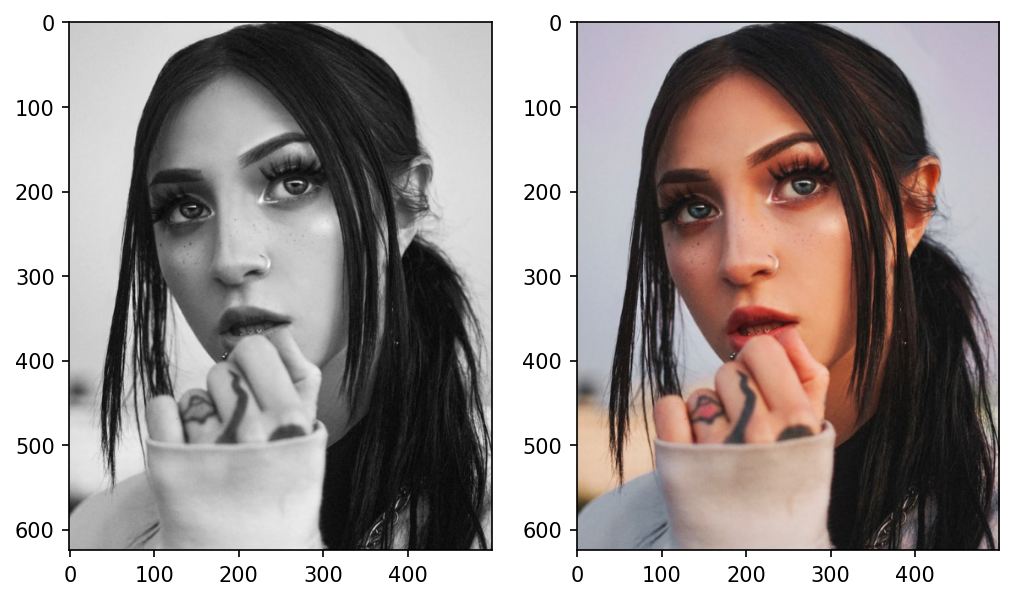

In [42]:
imshow(F_gray, F_rgb, dpi=150)

#### Cross-correlation operator

In [43]:
# H must be the kernel of size (2k + 1)^2
def cross_correlation(F, H):
    k = H.shape[0] // 2
    F_height, F_width = F.shape
    min_row = k
    min_col = k
    max_row = F_height - k
    max_col = F_width - k
    
    G = np.zeros(F.shape)
    
    for i in range(min_row, max_row):
        for j in range(min_col, max_col):
            G[i, j] = np.sum(F[i-k:i+k+1, j-k:j+k+1] * H)
    
    return G
    

#### Convolution operator

In [44]:
# H must be the kernel of size (2k + 1)^2
def convolution(F, H):
    k = H.shape[0] // 2
    F_height, F_width = F.shape
    min_row = k
    min_col = k
    max_row = F_height - k
    max_col = F_width - k
    
    G = np.zeros(F.shape)
    depth = 1 if len(G.shape) == 2 else 3
    for d in range(depth):
        for i in range(min_row, max_row):
            for j in range(min_col, max_col):
                tmp = F[i-k:i+k+1, j-k:j+k+1]
                tmp = np.flip(tmp, (0, 1))
                G[i, j] = np.sum(tmp * H)
    
    return G
    

#### Test

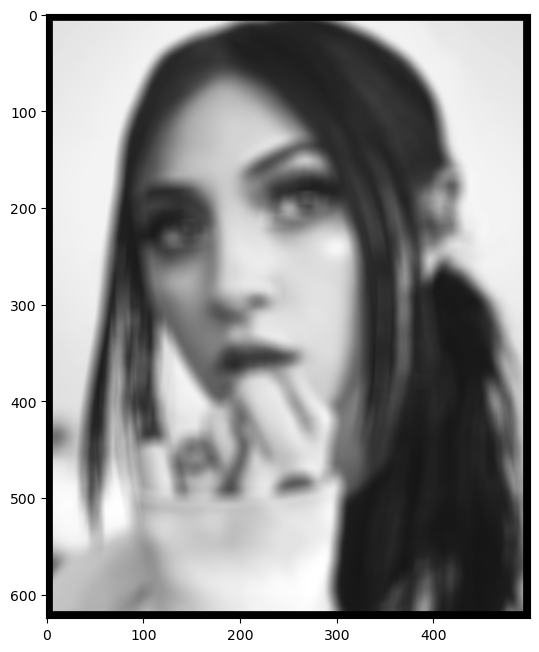

In [45]:
k = 7
size = 2 * k + 1
mean_filter = np.full((size, size), 1/(size**2))

blurred = convolution(F_gray, mean_filter)

imshow(blurred)

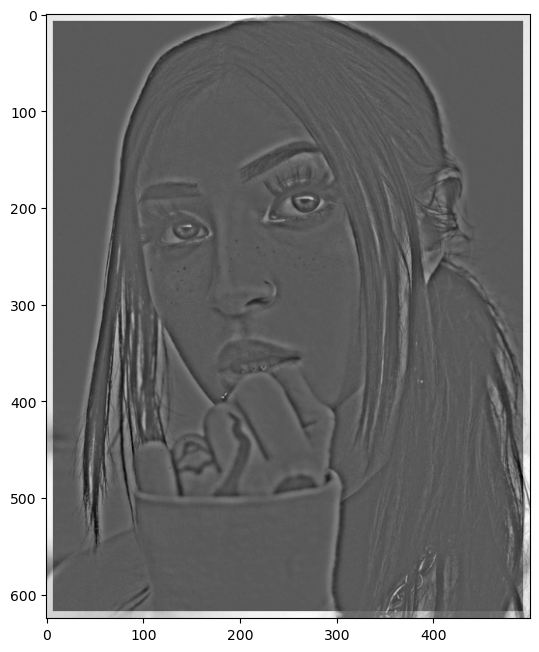

In [46]:
edges = F_gray - blurred
imshow(edges)

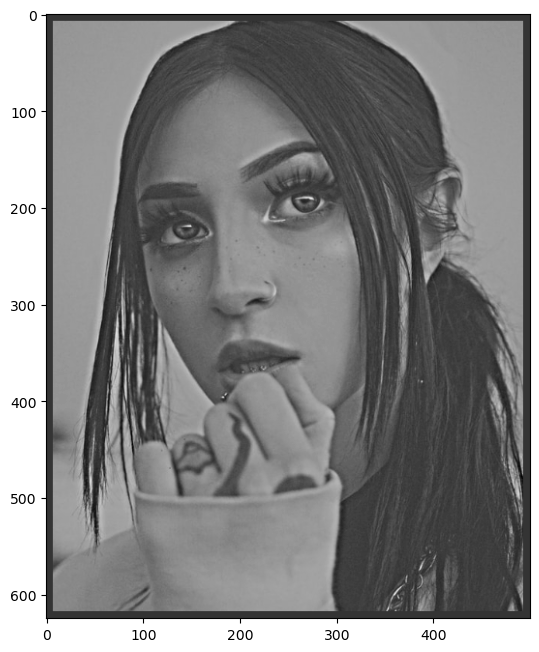

In [47]:
sharpen_filter = -mean_filter.copy()
sharpen_filter[k,k]+=2
sharpen = cross_correlation(F_gray, sharpen_filter)

imshow(sharpen)